In [1]:
%gui qt5

from ib_insync import *
util.useQt()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=14)

In [2]:
contract = Stock('TSLA', 'SMART', 'USD')

bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='60 D',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1)

In [3]:
bars[0]

BarData(date=datetime.datetime(2017, 4, 20, 15, 30), open=306.58, high=309.15, low=306.2, close=307.82, volume=7170, barCount=3954, average=308.049)

In [4]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,barCount,average
0,2017-04-20 15:30:00,306.58,309.15,306.20,307.82,7170,3954,308.049
1,2017-04-20 16:00:00,307.71,308.33,305.18,307.19,6486,3288,306.757
2,2017-04-20 17:00:00,307.04,307.71,306.57,307.25,3314,2155,307.105
3,2017-04-20 18:00:00,307.28,307.67,306.80,307.18,1973,1242,307.226
4,2017-04-20 19:00:00,307.24,307.44,300.23,302.59,20810,12477,303.077


,date,open,high,low,close,volume,barCount,average
412,2017-07-14 17:00:00,325.60,326.18,324.25,325.79,5740,2839,325.266
413,2017-07-14 18:00:00,325.69,325.94,324.66,324.96,3433,1616,325.333
414,2017-07-14 19:00:00,324.87,325.42,324.00,324.96,3096,1685,324.783
415,2017-07-14 20:00:00,324.96,326.70,324.53,326.27,3817,2020,325.782
416,2017-07-14 21:00:00,326.33,328.42,326.27,327.67,9228,5358,327.457


<IPython.core.display.Javascript object>


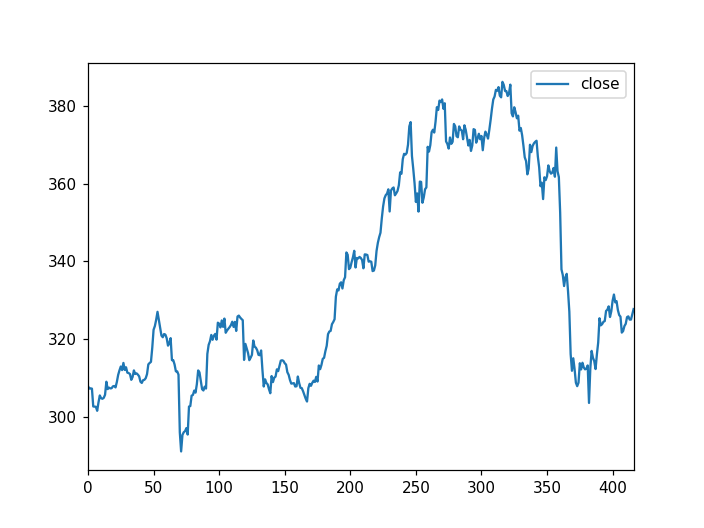

In [8]:
%matplotlib notebook
import seaborn as sns

df.plot(y='close')

In [9]:
display?